In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
#     -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [2]:
testing_sequences

[[1, 1, 1, 1, 30, 1, 1, 5, 519, 109],
 [202, 1, 8, 31, 1, 1, 2, 854, 773],
 [18, 380, 191, 2, 915, 76, 8, 4, 1],
 [1, 1, 299, 337, 3, 1, 1],
 [162, 1, 1, 6, 1, 1, 348, 1],
 [44, 1, 1, 627],
 [404, 345, 2, 1, 12, 1, 1, 1, 1, 6, 1, 1, 1],
 [314, 37, 1, 2, 1, 8, 1, 1, 43, 730, 10, 1, 439, 1],
 [1, 1, 12, 1, 136, 45, 2, 1, 28, 24, 6, 83, 2, 196, 1, 95, 1, 493, 230],
 [26, 4, 1, 11, 1, 1, 1, 21, 860, 820],
 [1, 1, 1, 18, 136, 1, 2, 1],
 [262, 1, 2, 1, 80, 8, 1, 1, 1, 43, 1],
 [20, 1, 12, 1, 84, 1, 4, 1, 3, 4, 1, 440],
 [1, 1, 4, 52, 9, 1, 21],
 [585, 1, 1, 2, 1, 309, 84, 29, 1, 45, 1, 177],
 [4, 1, 90, 155, 450, 735, 30, 1, 1, 1],
 [1, 760, 277, 164, 6, 49, 54, 2, 1, 80, 1, 1],
 [102, 23, 9, 544, 5, 1, 1],
 [1, 1, 481, 4, 1, 128, 75, 1, 1, 5, 12, 313, 1, 1, 1],
 [1, 1, 2, 185, 946, 17, 1, 1, 462],
 [162, 129, 144, 1, 115, 97, 95, 123, 8, 1],
 [125, 79, 1, 16, 367, 1, 19, 1, 1, 15, 128, 69],
 [56, 1, 2, 499, 6, 570, 1, 1, 1, 527, 83, 215],
 [28, 11, 29, 34, 1, 2, 1],
 [1, 544, 641, 124],
 [2

In [18]:
print(testing_padded[:2])
print(training_padded[:2])
print(training_labels[:2])
print(testing_labels[:2])

[[  1   1   1   1  30   1   1   5 519 109   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [202   1   8  31   1   1   2 854 773   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
[[328   1

In [20]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 3s 142us/sample - loss: 0.4773 - accuracy: 0.7549 - val_loss: 0.4093 - val_accuracy: 0.8135
Epoch 2/50
20000/20000 [==============================] - 2s 114us/sample - loss: 0.3624 - accuracy: 0.8382 - val_loss: 0.3925 - val_accuracy: 0.8193
Epoch 3/50
20000/20000 [==============================] - 2s 110us/sample - loss: 0.3223 - accuracy: 0.8580 - val_loss: 0.3901 - val_accuracy: 0.8290
Epoch 4/50
20000/20000 [==============================] - 2s 111us/sample - loss: 0.2863 - accuracy: 0.8777 - val_loss: 0.3951 - val_accuracy: 0.8243
Epoch 5/50
20000/20000 [==============================] - 2s 113us/sample - loss: 0.2500 - accuracy: 0.8954 - val_loss: 0.4207 - val_accuracy: 0.8188
Epoch 6/50
20000/20000 [==============================] - 2s 113us/sample - loss: 0.2130 - accuracy: 0.9132 - val_loss: 0.4711 - val_accuracy: 0.8107
Epoch 7/50
20000/20000 [===========================

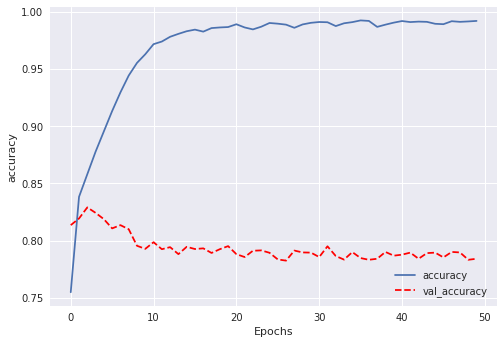

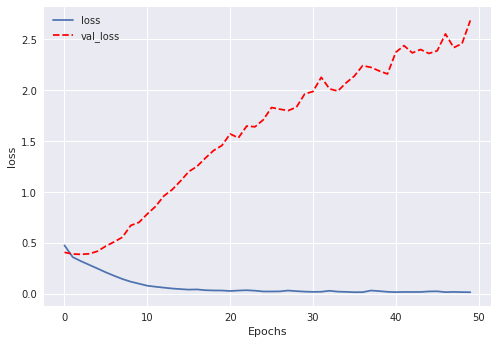

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.style.use('seaborn')
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], 'r--')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
model.save("test.h5")